### **1.Import Required Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from scipy.stats import ttest_ind


### **2. Load Dataset**

In [3]:
file_path = "GSE278723_AD_C.csv"
df = pd.read_csv(file_path)


### **3. Extract Gene Names and Expression Values**



In [5]:
gene_names = df.iloc[:, 0]
data_values = df.iloc[:, 1:]


## **4. Identify Condition Labels**

In [4]:
# C = Control, AD = Alzheimer's Disease
conditions = np.array(["C" if "_C" in col else "AD" for col in data_values.columns])


# **5. Transpose Data for Machine Learning**

In [6]:
# Transpose: Samples as rows, Genes as columns
data_values_T = data_values.T


# **6. Create Binary Labels**

In [7]:
# 0 = Control, 1 = AD
labels = np.array([0 if cond == "C" else 1 for cond in conditions])


# **7. Standardize Features**

In [8]:
scaler = StandardScaler()
data_values_T_scaled = scaler.fit_transform(data_values_T)


# **8. Apply PCA for Dimensionality Reduction**

In [9]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data_values_T_scaled)


# **9. Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    principal_components, labels, test_size=0.2, random_state=42
)


# **10. Train Random Forest Classifier**

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **11. Predict and Evaluate Model**

In [12]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}\n")




Random Forest Performance:
Accuracy: 0.9643
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      1.00      0.96        13

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28

ROC AUC Score: 1.0000



# **12. Plot PCA Explained Variance**

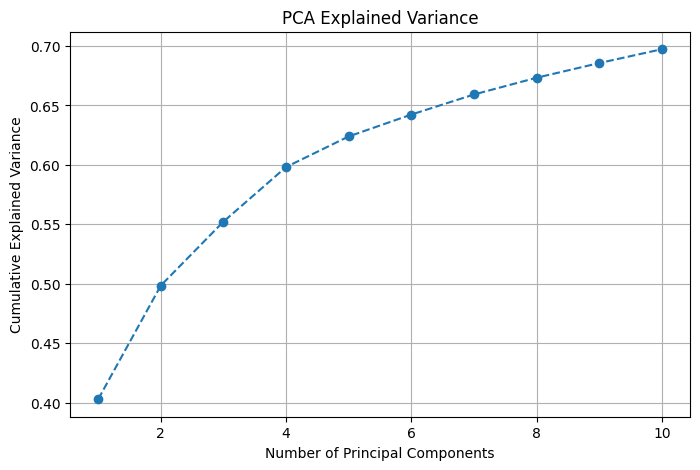

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()
